# Movimiento de un resorte ideal

Haz click [aquí](https://youtu.be/yw3u9KuznIE) para ver el video subido a YouTube

En este video se visualiza el movimiento de un resorte ideal con una masa en su extremo derecho. La constante elástica $k$, la longitud natural $l_0$, los kilogramos de la masa, la velocidad inicial $v_0$ que se le imprime a la masa, la posición inicial $x_0$ de la masa y la cantidad de períodos $p$ considerados son personalizables.

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_16484\3560754142.py:14: RuntimeWarning: invalid value encountered in sqrt
  omega = np.sqrt(k/m)


Animación a nan fotogramas por segundo


ValueError: cannot convert float NaN to integer

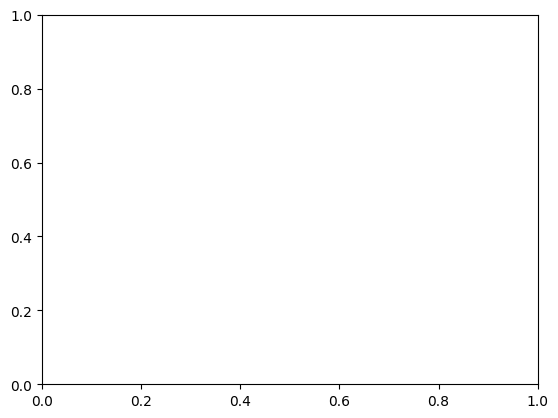

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='html5')

m = 1 # kg | Masa
k = 20 # N/m | Constante elástica
x0 = 5 # m | Posición inicial de la masa con respecto al extremo izquierdo del resorte
v0 = 0 # m/s | Velocidad inicial
l0 = 3 # m | Longitud natural del resorte
t0 = 0 # s | Tiempo inicial

omega = np.sqrt(k/m)

phi = np.arctan( (-v0)/((x0 - l0)*omega) ) - omega*t0 # Fase
A = (x0 - l0)/(np.cos(omega*t0 + phi)) # Amplitud

p = 10 # Cantidad de períodos que deseo ver en la animación

t = np.linspace(t0, t0 + p*2*np.pi/omega, 850) # Defino el inicio y el final de t como para que dure exactamente p períodos, iniciando en t0
x = A*np.cos(omega*t+phi) + l0

fig = plt.figure()                       
ax = fig.gca()                           

def actualizar(i):
    ax.clear()                           
    plt.scatter(x[i], 0, color = 'red', label = 'Masa') #Masa
    xx = np.linspace(0, x[i], 1000)
    a = 20*np.pi/x[i]
    yy = np.sin(a*xx)                                   #Resorte
    plt.plot(xx, yy, color = 'black', label = 'Resorte')
    plt.axvline(l0, linestyle = '--', label = 'l0', color = 'blue')             
    plt.title('t = ' + str(round(t[i], 2)) + 's')
    plt.xlim(min(min(x), 0)-1, max(max(x), 0)+1)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

f = len(t)/(t[-1]-t[0])
print(f'Animación a {round(f, 2)} fotogramas por segundo')
X = 1000/f

ani = animation.FuncAnimation(fig, actualizar, range(len(t)), interval = X) # (Agarra la figura llamada "fig", itera la función "actualizar", y saca "n" fotos definidas por el range. interval = X hace que cada foto esté sacada cada X milisegundos)
HTML(ani.to_html5_video())